     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 32.8 MB/s eta 0:00:00
--- Results ---
Maximize Return:
Asset 1: 0.0
Asset 2: 0.0
Asset 3: 1.0
Asset 4: 0.0
Asset 5: 0.0
Expected Return: 0.15
Minimize Risk:
Asset 1: 0.0
Asset 2: 0.0
Asset 3: 1.0
Asset 4: 0.0
Asset 5: 0.0
Standard Deviation: 0.1


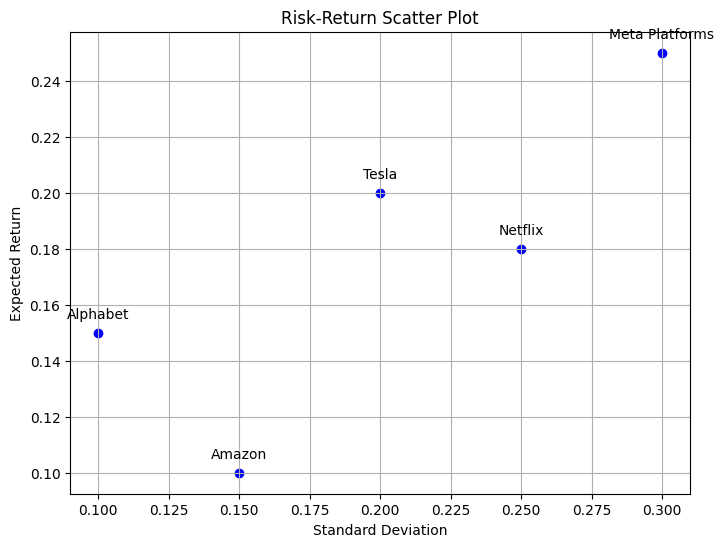

In [1]:
!pip install pulp

from pulp import *

# Define the number of assets in the portfolio
n = 5

# Define the expected return and standard deviation for each asset
returns = [0.1, 0.2, 0.15, 0.25, 0.18]  # Example expected returns for Amazon, Tesla, Alphabet, Meta Platforms, Netflix
deviations = [0.15, 0.2, 0.1, 0.3, 0.25]  # Example standard deviations for Amazon, Tesla, Alphabet, Meta Platforms, Netflix

# Create two new LpProblem objects, one for maximizing the return and one for minimizing the risk
return_problem = LpProblem("Maximize_Return", LpMaximize)
risk_problem = LpProblem("Minimize_Risk", LpMinimize)

# Define variables using the LpVariable class, one for each asset in the portfolio
x = [LpVariable(f"x{i}", 0, 1) for i in range(n)]

# Add constraints to both problems, ensuring that the portfolio is fully invested and the investment in each asset is non-negative
return_problem += sum(x) == 1
risk_problem += sum(x) == 1
for i in range(n):
    return_problem += x[i] >= 0
    risk_problem += x[i] >= 0

# Define the objectives for both problems, maximizing the expected return and minimizing the risk
return_problem += sum([x[i] * returns[i] for i in range(n)])
risk_problem += sum([x[i] * deviations[i] for i in range(n)])

# Solve both problems using the solve method of the LpProblem class
return_problem.solve()
risk_problem.solve()

# Print the results, including the fraction of the portfolio invested in each asset and the expected return and standard deviation of the portfolio
print("--- Results ---")
print("Maximize Return:")
for i in range(n):
    print(f"Asset {i+1}: {x[i].value()}")
print(f"Expected Return: {value(return_problem.objective)}")
print("Minimize Risk:")
for i in range(n):
    print(f"Asset {i+1}: {x[i].value()}")
print(f"Standard Deviation: {value(risk_problem.objective)}")

import matplotlib.pyplot as plt

# Data for the five companies
companies = ['Amazon', 'Tesla', 'Alphabet', 'Meta Platforms', 'Netflix']
returns = [0.1, 0.2, 0.15, 0.25, 0.18]  # Example expected returns
deviations = [0.15, 0.2, 0.1, 0.3, 0.25]  # Example standard deviations

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(deviations, returns, color='blue')

# Add labels and title
plt.title('Risk-Return Scatter Plot')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')

# Add company names as annotations
for i, company in enumerate(companies):
    plt.annotate(company, (deviations[i], returns[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Show plot
plt.grid(True)
plt.show()
